___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,4)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', None)
#pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

## Exploratory Data Analysis and Visualization

In [2]:
# pip install xlrd

In [3]:
# pip install openpyxl

In [4]:
df = pd.read_excel("Raisin_Dataset.xlsx")

In [5]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.0,87804.127778,39002.111390,25387.000000,59348.000000,78902.000000,105028.250000,235047.000000
MajorAxisLength,900.0,430.929950,116.035121,225.629541,345.442898,407.803951,494.187014,997.291941
MinorAxisLength,900.0,254.488133,49.988902,143.710872,219.111126,247.848409,279.888575,492.275279
Eccentricity,900.0,0.781542,0.090318,0.348730,0.741766,0.798846,0.842571,0.962124
ConvexArea,900.0,91186.090000,40769.290132,26139.000000,61513.250000,81651.000000,108375.750000,278217.000000
Extent,900.0,0.699508,0.053468,0.379856,0.670869,0.707367,0.734991,0.835455
Perimeter,900.0,1165.906636,273.764315,619.074000,966.410750,1119.509000,1308.389750,2697.753000


In [8]:
df["Class"].value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

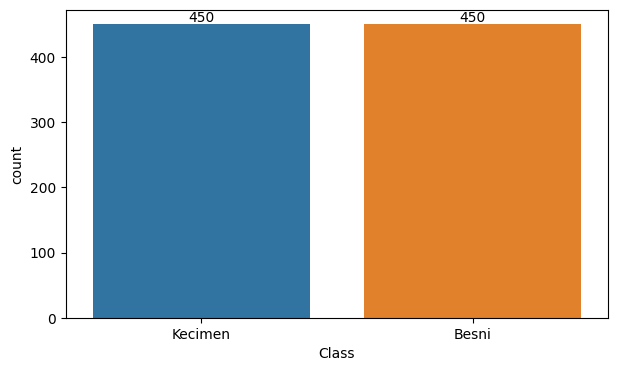

In [9]:
ax = sns.countplot(x="Class", data=df)
ax.bar_label(ax.containers[0]);

In [10]:
df["Class"] = df["Class"].map({"Kecimen":0,"Besni":1})

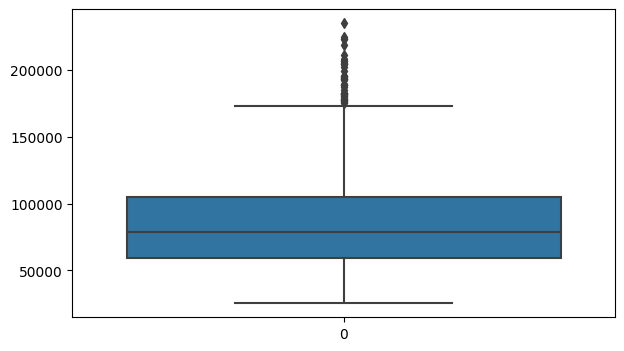

In [11]:
sns.boxplot(df.Area);

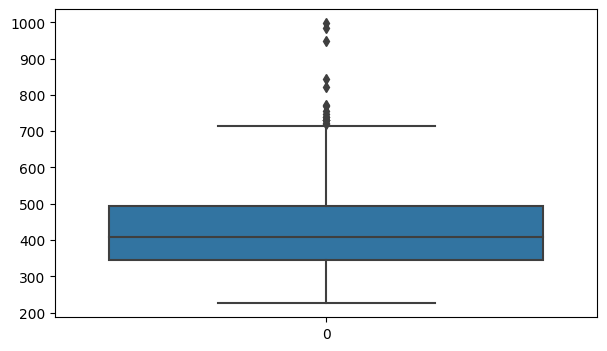

In [12]:
sns.boxplot(df.MajorAxisLength);

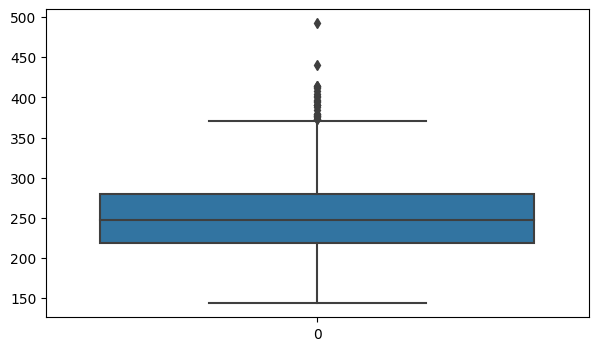

In [13]:
sns.boxplot(df.MinorAxisLength);

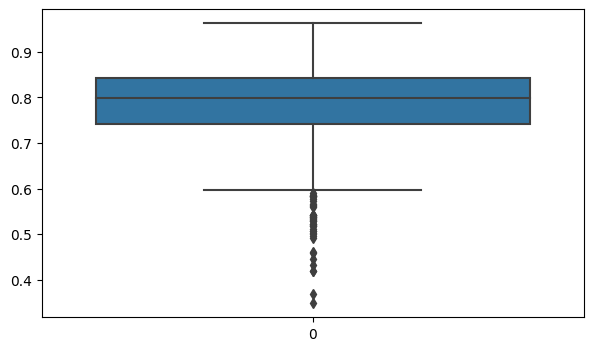

In [14]:
sns.boxplot(df.Eccentricity);

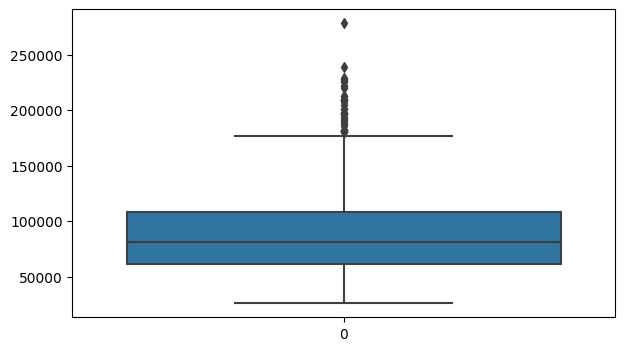

In [15]:
sns.boxplot(df.ConvexArea);

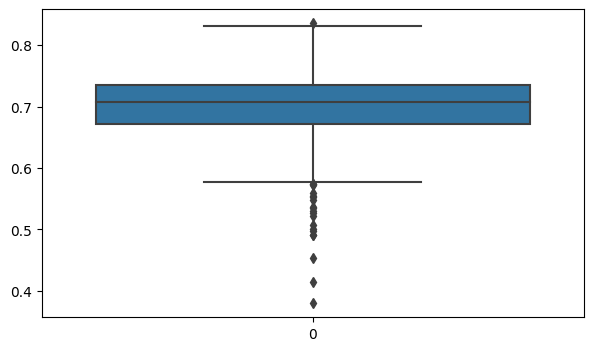

In [16]:
sns.boxplot(df.Extent);

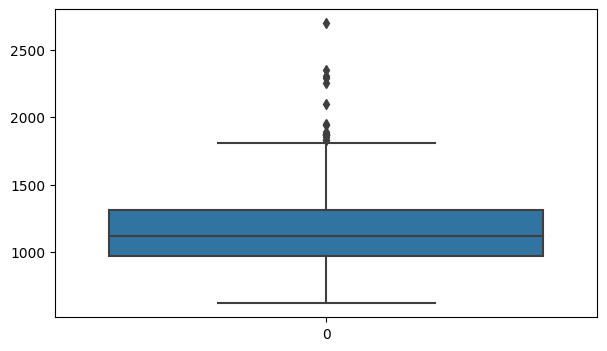

In [17]:
sns.boxplot(df.Perimeter);

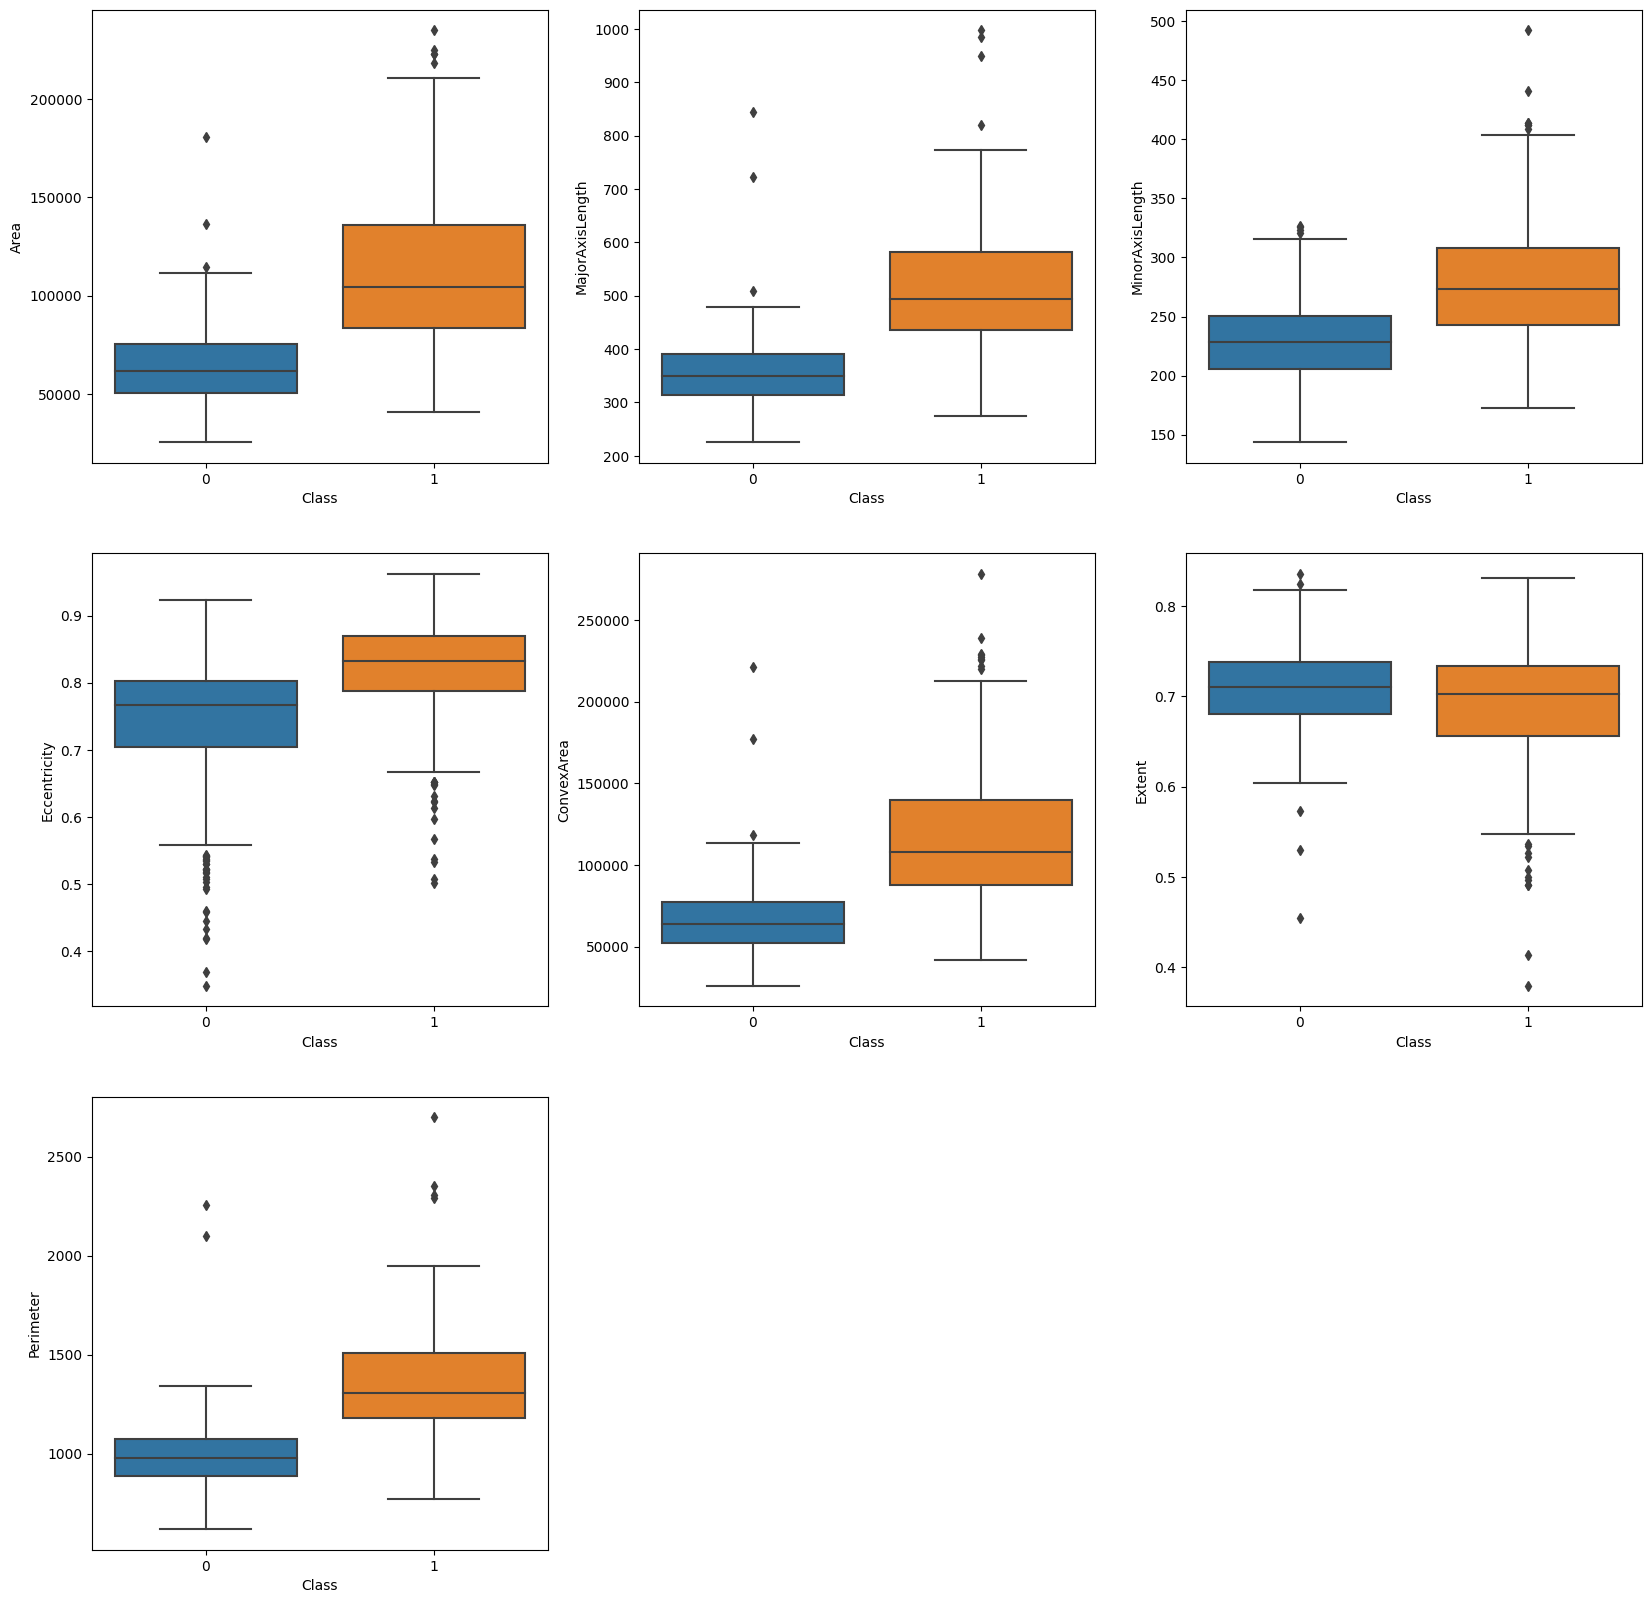

In [18]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Class":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Class',y=feature, data=df)

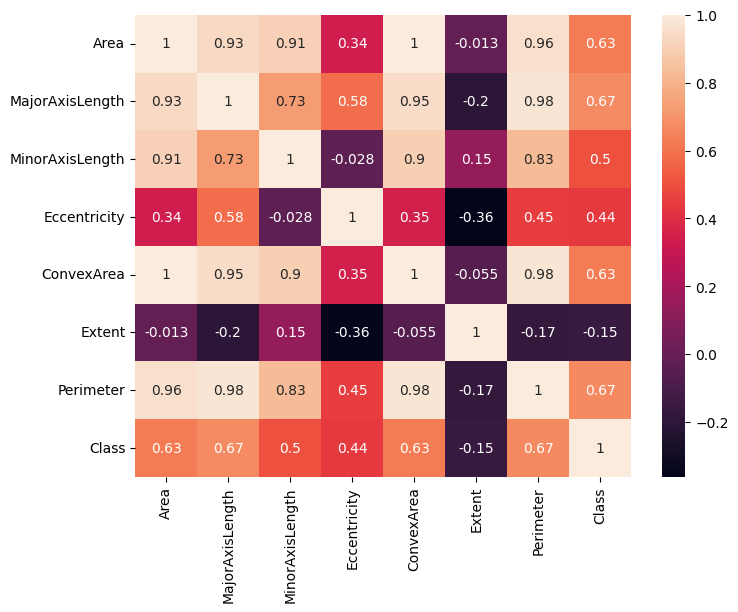

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True);

In [20]:
df.corr()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
Area,1.000000,0.932774,0.906650,0.336107,0.995920,-0.013499,0.961352,0.625715
MajorAxisLength,0.932774,1.000000,0.728030,0.583608,0.945031,-0.203866,0.977978,0.673194
MinorAxisLength,0.906650,0.728030,1.000000,-0.027683,0.895651,0.145322,0.827417,0.503102
Eccentricity,0.336107,0.583608,-0.027683,1.000000,0.348210,-0.361061,0.447845,0.438500
ConvexArea,0.995920,0.945031,0.895651,0.348210,1.000000,-0.054802,0.976612,0.625567
Extent,-0.013499,-0.203866,0.145322,-0.361061,-0.054802,1.000000,-0.173449,-0.154689
Perimeter,0.961352,0.977978,0.827417,0.447845,0.976612,-0.173449,1.000000,0.665981
Class,0.625715,0.673194,0.503102,0.438500,0.625567,-0.154689,0.665981,1.000000


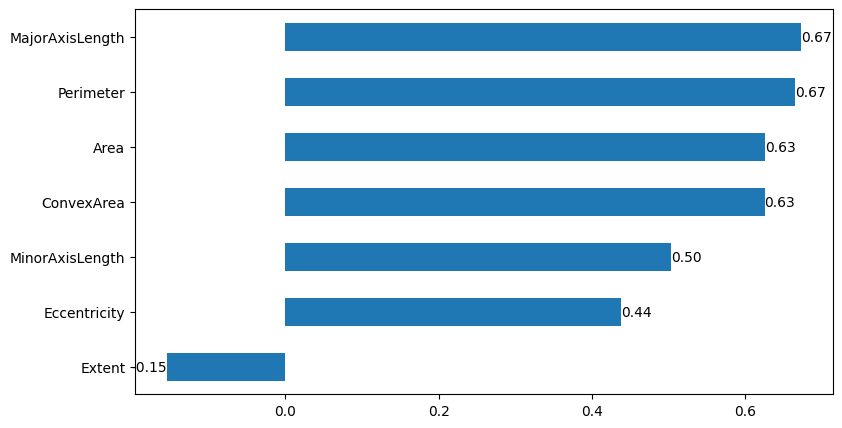

In [21]:
plt.figure(figsize=(9,5))
ax = df.corr()["Class"].drop("Class").sort_values().plot.barh()
ax.bar_label(ax.containers[0], fmt='%.2f');

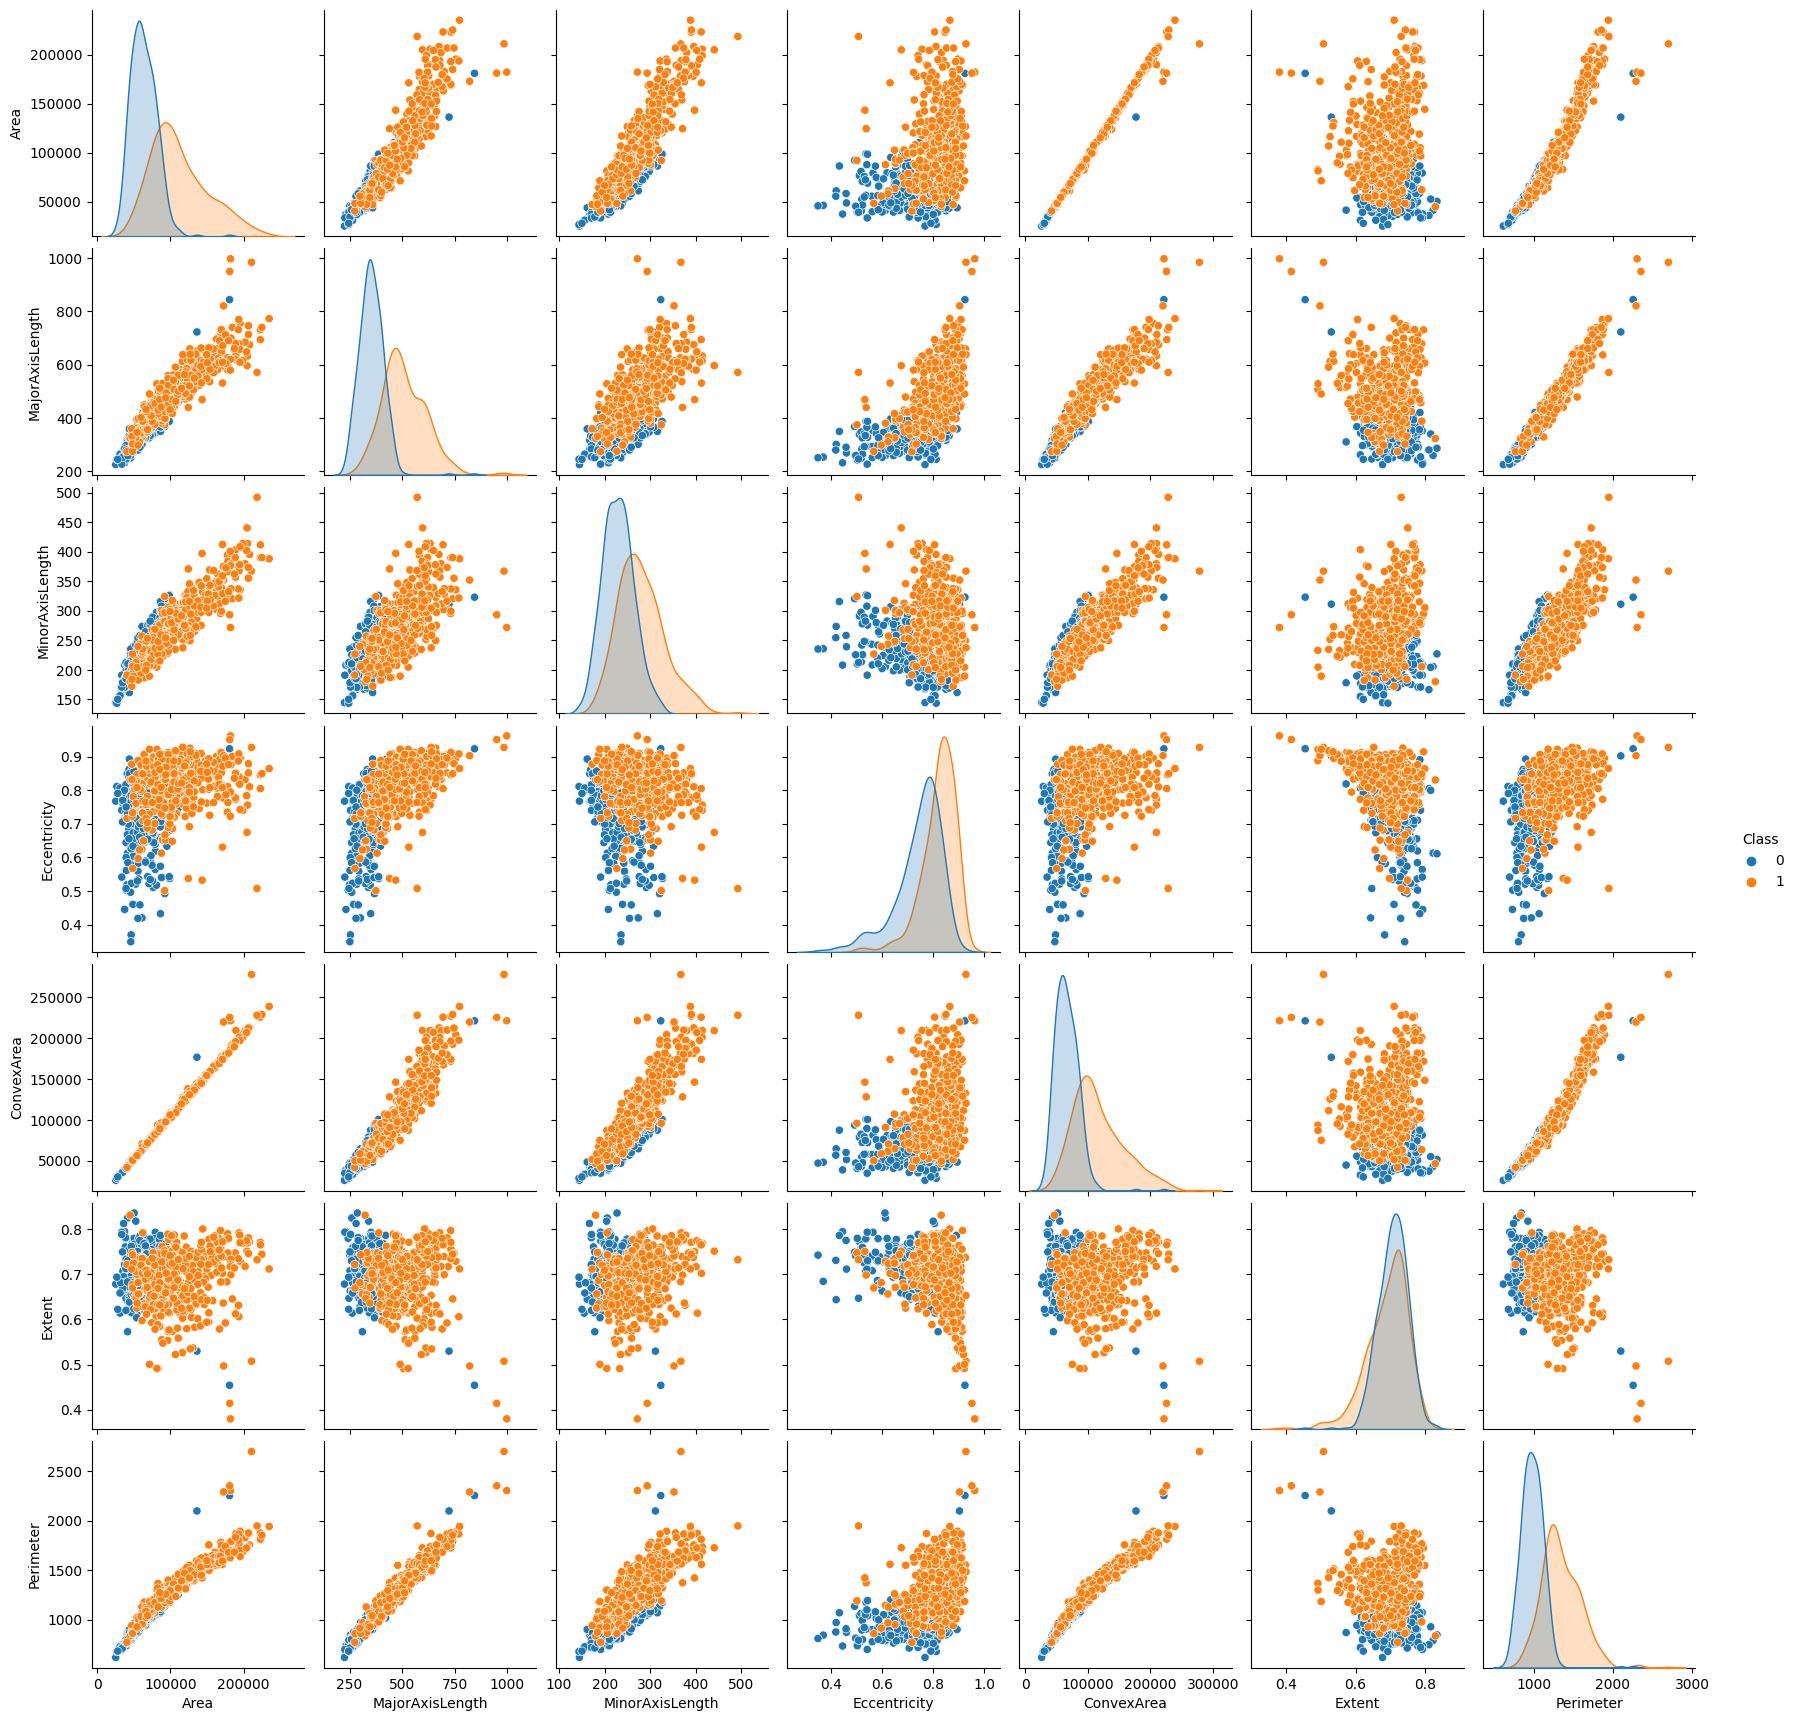

In [22]:
sns.pairplot(df, hue = "Class");

## Train | Test Split and Scaling

* for train_test_split use fallowing arguments:
    * train_size: 0.2
    * stratify: True
    * random_state: 10    
* Use StandardScaler to scale the data.

In [23]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=10)

# Logistic Regression

* Train the model using the training set with the default parameters.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [27]:
from sklearn.pipeline import Pipeline

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [28]:
y_pred = pipe_model.predict(X_test)

In [29]:
y_pred_proba = pipe_model.predict_proba(X_test)
y_pred_proba

array([[9.09233226e-01, 9.07667744e-02],
       [2.13923600e-01, 7.86076400e-01],
       [8.61366061e-01, 1.38633939e-01],
       [9.75006614e-01, 2.49933859e-02],
       [7.18428741e-01, 2.81571259e-01],
       [9.78090204e-01, 2.19097960e-02],
       [9.67153729e-01, 3.28462709e-02],
       [2.69784269e-01, 7.30215731e-01],
       [6.22413524e-01, 3.77586476e-01],
       [8.28165778e-01, 1.71834222e-01],
       [5.50087417e-01, 4.49912583e-01],
       [6.48124125e-01, 3.51875875e-01],
       [1.33636635e-03, 9.98663634e-01],
       [7.34673174e-03, 9.92653268e-01],
       [2.22192344e-04, 9.99777808e-01],
       [4.06025195e-03, 9.95939748e-01],
       [1.03563509e-04, 9.99896436e-01],
       [2.05679569e-01, 7.94320431e-01],
       [8.80378670e-01, 1.19621330e-01],
       [7.27309014e-01, 2.72690986e-01],
       [9.54065988e-01, 4.59340125e-02],
       [6.00635256e-04, 9.99399365e-01],
       [7.48381106e-01, 2.51618894e-01],
       [9.86770325e-01, 1.32296753e-02],
       [2.814178

In [30]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1] # Probability of belonging to class 1
test_data.sample(10)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred,pred_proba
77,42637,293.429580,189.432158,0.763693,44052,0.725119,814.182,0,0,0.024993
140,49175,281.431421,224.485896,0.603111,50672,0.727613,845.128,0,0,0.020318
682,106923,591.115838,234.823346,0.917709,111428,0.522279,1425.109,1,1,0.998294
787,105961,497.701460,275.971726,0.832189,109992,0.697562,1347.989,1,1,0.949439
874,101770,468.667900,279.812910,0.802212,103475,0.785178,1233.824,1,1,0.712088
382,26908,245.755781,143.710872,0.811198,28607,0.693487,678.815,0,0,0.010310
827,61861,345.943650,235.430468,0.732706,67390,0.702280,1063.621,1,0,0.239231
840,48551,302.812835,205.963380,0.733057,50748,0.742824,862.001,1,0,0.032846
766,86202,437.771261,253.909321,0.814613,90825,0.705146,1199.809,1,1,0.727360
313,38724,291.001092,170.776267,0.809690,40133,0.780883,769.691,0,0,0.016696


## Model Performance
*Check the accuracy of the model using the train and test set by given eval_metric function.

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [33]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[81  9]
 [14 76]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        90
           1       0.89      0.84      0.87        90

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[317  43]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       360
           1       0.88      0.85      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



### Cross Validate

* Use the cross_val_score function to evaluate the model using the train set.

In [34]:
from sklearn.model_selection import cross_validate

In [35]:
from sklearn.model_selection import StratifiedKFold

In [36]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

cv = StratifiedKFold(n_splits=10) # In each iteration, divides labels according to their ratio in train and in test sets
                                

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'],#maximize scores of class 1.
                        cv = cv, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_accuracy,train_accuracy
1,0.059077,0.020615,0.935484,0.881789,0.805556,0.851852,0.865672,0.866562,0.875000,0.868827
2,0.060455,0.024000,0.857143,0.878981,0.833333,0.851852,0.845070,0.865204,0.847222,0.867284
3,0.044890,0.016000,0.842105,0.887097,0.888889,0.848765,0.864865,0.867508,0.861111,0.870370
4,0.028234,0.015810,0.767442,0.879365,0.916667,0.854938,0.835443,0.866980,0.819444,0.868827
5,0.056992,0.024103,0.933333,0.876972,0.777778,0.858025,0.848485,0.867395,0.861111,0.868827
6,0.050704,0.007999,0.903226,0.869159,0.777778,0.861111,0.835821,0.865116,0.847222,0.865741
7,0.038104,0.010005,0.942857,0.875399,0.916667,0.845679,0.929577,0.860283,0.930556,0.862654
8,0.040000,0.021820,0.804878,0.882166,0.916667,0.854938,0.857143,0.868339,0.847222,0.870370
9,0.080001,0.031999,0.857143,0.871069,0.833333,0.854938,0.845070,0.862928,0.847222,0.864198
10,0.039455,0.024002,0.967742,0.875796,0.833333,0.848765,0.895522,0.862069,0.902778,0.864198


In [37]:
df_scores.mean()[2:]

test_precision     0.881135
train_precision    0.877779
test_recall        0.850000
train_recall       0.853086
test_f1            0.862267
train_f1           0.865238
test_accuracy      0.863889
train_accuracy     0.867130
dtype: float64

In [38]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[81  9]
 [14 76]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        90
           1       0.89      0.84      0.87        90

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[317  43]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       360
           1       0.88      0.85      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



### GridSearchCV
* Use the GridSearchCV function to find the best parameters for the model.

In [39]:
from sklearn.model_selection import GridSearchCV

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5]
class_weight= ["balanced", None] 

# We can use class_weight="balanced" to balance classes in unbalanced data sets. 
# When the data is balanced, the model tries to increase the recall score of that class by 
# increasing the precision score of the less class.

# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__class_weight":class_weight,
              "logistic__solver":solver}



cv = StratifiedKFold(n_splits = 10) #shuffle = True, random_state = 42

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "recall",   # By default, the score of the 1 class is max. it does.
                                                 #0 class that max. f1_0 = make_scorer(f1_score, pos_label =0)
                          n_jobs = -1,
                          return_train_score=True)

# Since GridsearchCV also performs Cross Validation, we specify return_train_score=True
# to obtain validation and train set scores. (It just returns the metric score we wrote against the scoring)

In [40]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.01, 0.1, 1, 5],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['lbfgs', 'liblinear', 'sag',
                                              'saga']},
             return_train_score=True, scoring='recall')

In [41]:
grid_model.best_params_

{'logistic__C': 5,
 'logistic__class_weight': 'balanced',
 'logistic__penalty': 'l1',
 'logistic__solver': 'saga'}

In [42]:
grid_model.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=5, class_weight='balanced', penalty='l1',
                                    solver='saga'))])

In [43]:
grid_model.best_index_

51

In [44]:
pd.DataFrame(grid_model.cv_results_).loc[51, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.855556
mean_train_score    0.855247
Name: 51, dtype: object

In [45]:
grid_model.best_score_

0.8555555555555555

In [46]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[81  9]
 [12 78]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89        90
           1       0.90      0.87      0.88        90

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180


Train_Set
[[318  42]
 [ 51 309]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       360
           1       0.88      0.86      0.87       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

* Use the roc_curve function to calculate the ROC curve and compare logistic regression models with default and tuned parameters. 

In [47]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, roc_curve,\
                            average_precision_score, precision_recall_curve

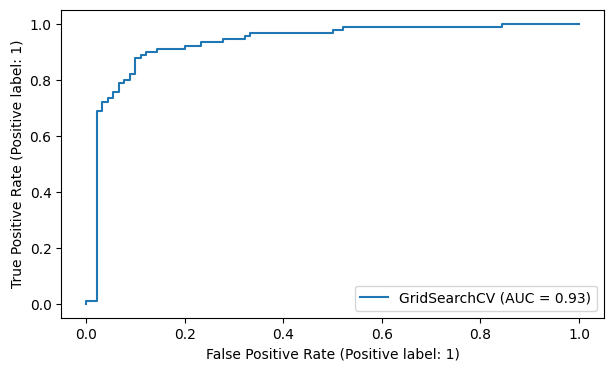

In [48]:
plot_roc_curve(grid_model, X_test, y_test);

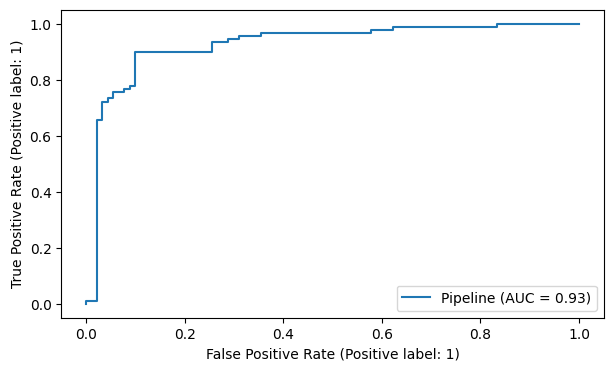

In [49]:
plot_roc_curve(pipe_model, X_test, y_test);

## KNN (K-Nearest Neighbors)
* Train the model using the training set with the default parameters.

In [50]:
from sklearn.neighbors import KNeighborsClassifier

operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))]

knn_model = Pipeline(steps=operations)

knn_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [51]:
y_pred = knn_model.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0], dtype=int64)

In [52]:
y_pred_proba = knn_model.predict_proba(X_test)

In [53]:
confusion_matrix(y_test, y_pred)

array([[80, 10],
       [16, 74]], dtype=int64)

In [55]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

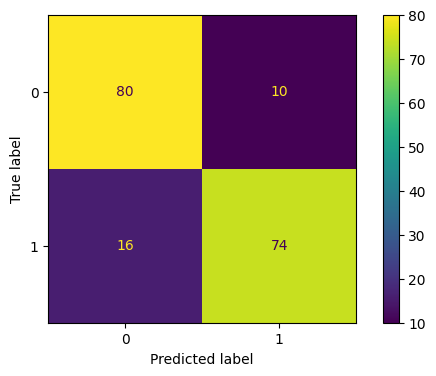

In [56]:
plot_confusion_matrix(knn_model, X_test, y_test);

In [57]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [58]:
eval_metric(knn_model, X_train, y_train, X_test, y_test)

Test_Set
[[80 10]
 [16 74]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        90
           1       0.88      0.82      0.85        90

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[332  28]
 [ 55 305]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       360
           1       0.92      0.85      0.88       360

    accuracy                           0.88       720
   macro avg       0.89      0.88      0.88       720
weighted avg       0.89      0.88      0.88       720



### Elbow Method for Choosing Reasonable K Values
* Use the elbow method to find the optimal number of neighbors.

In [59]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score, cross_validate

In [60]:
test_error_rates = []

for k in range(1,30):
    
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]

    knn_pipe_model = Pipeline(steps=operations)
    
    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring = ['accuracy'], cv = 10)
    
    accuracy_mean = scores["test_accuracy"].mean() 
    
    test_error = 1 - accuracy_mean
    
    test_error_rates.append(test_error)

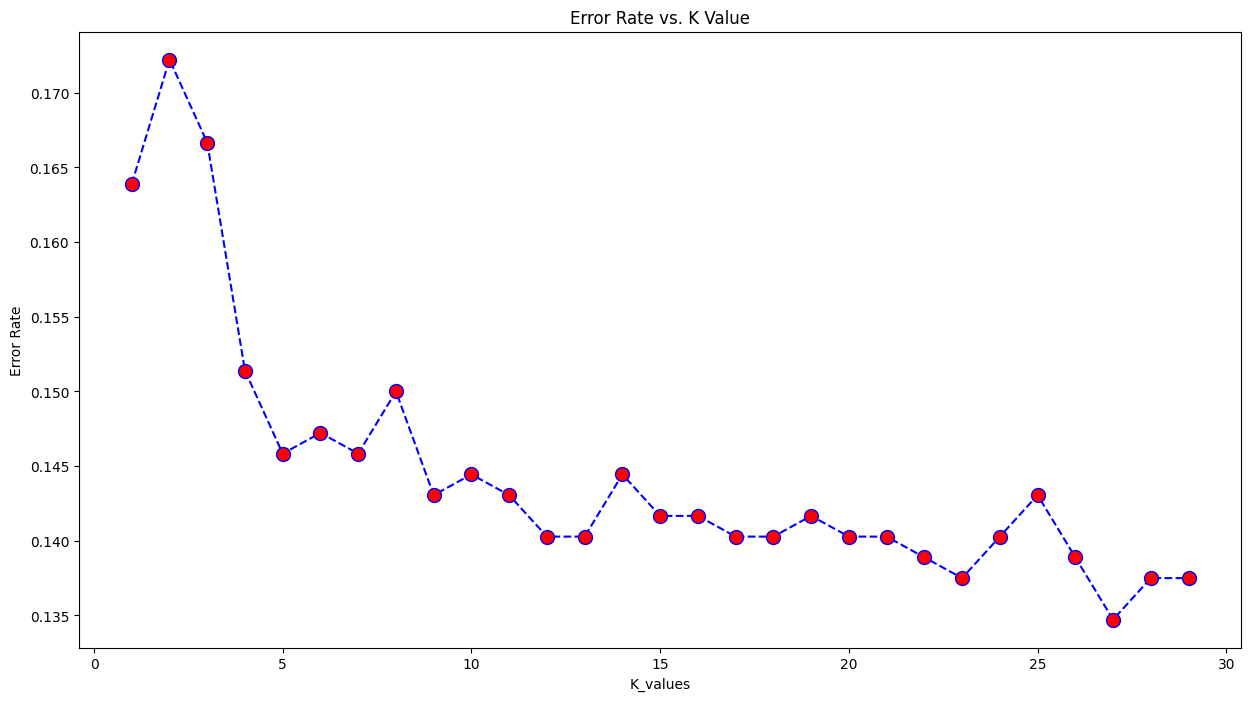

In [62]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate');

# We visualize the error scores we find.

In [63]:
test_error_rates = []
train_error_rates = []


for k in range(1,30):
    
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]

    knn_pipe_model = Pipeline(steps=operations)
    
    knn_pipe_model.fit(X_train,y_train) 
    
    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring = ['accuracy'], cv = 10, return_train_score=True)
    
    accuracy_test_mean = scores["test_accuracy"].mean() 
    accuracy_train_mean = scores["train_accuracy"].mean() 

    
    test_error = 1 - accuracy_test_mean
    train_error = 1 - accuracy_train_mean
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

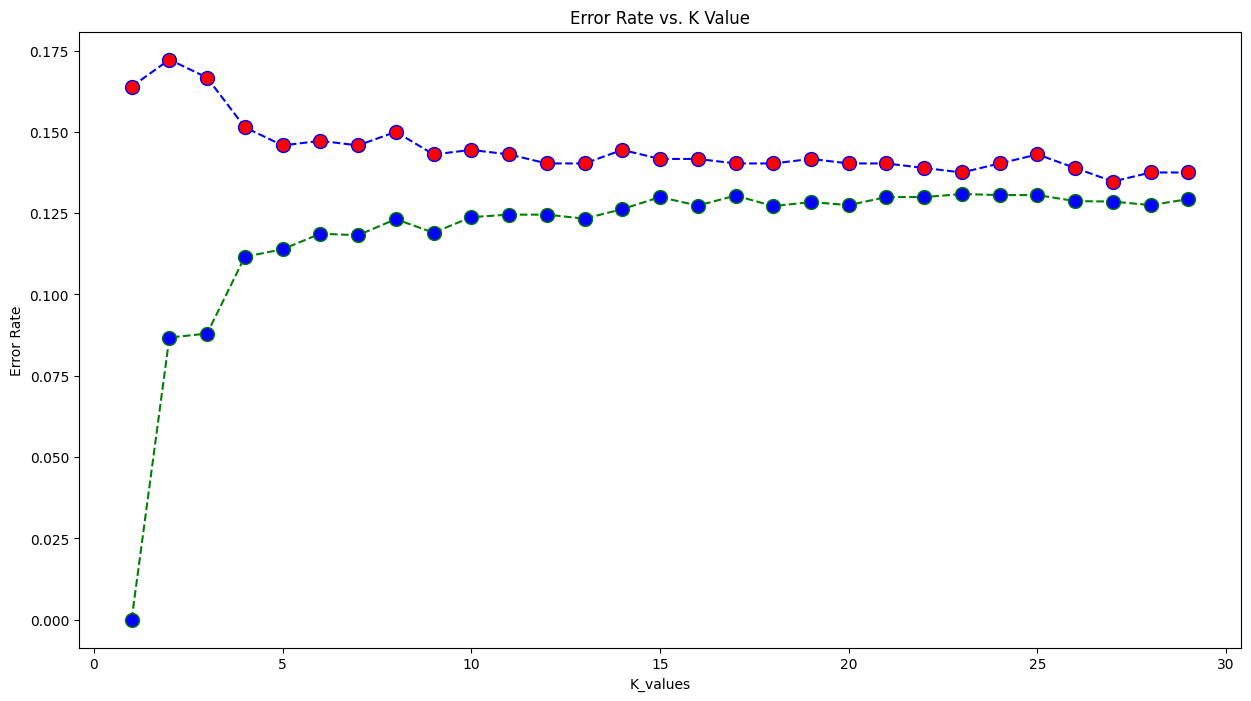

In [64]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate');

### Scores by Various K Values
* Select some k values smaller and bigger than the optimal k value to see how the model performs.

In [65]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=12))]
knn1 = Pipeline(steps=operations)

knn1.fit(X_train, y_train)
print('WITH K=1\n')
eval_metric(knn1, X_train, y_train, X_test, y_test)


WITH K=1

Test_Set
[[81  9]
 [19 71]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        90
           1       0.89      0.79      0.84        90

    accuracy                           0.84       180
   macro avg       0.85      0.84      0.84       180
weighted avg       0.85      0.84      0.84       180


Train_Set
[[337  23]
 [ 68 292]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       360
           1       0.93      0.81      0.87       360

    accuracy                           0.87       720
   macro avg       0.88      0.87      0.87       720
weighted avg       0.88      0.87      0.87       720



### Cross Validate
* Use the cross_val_score function to evaluate the model using the train set. Use optimal k value which you found in the elbow method.

In [66]:
from sklearn.model_selection import cross_val_score, cross_validate

In [69]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=12))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,0.016001,0.023999,0.847222,0.881173,0.962963,0.933333,0.722222,0.820988,0.825397,0.873563
2,0.020003,0.039998,0.791667,0.887346,0.862069,0.934256,0.694444,0.833333,0.769231,0.880914
3,0.020000,0.020001,0.847222,0.878086,0.857143,0.929825,0.833333,0.817901,0.845070,0.870279
4,0.009999,0.019965,0.833333,0.873457,0.800000,0.914384,0.888889,0.824074,0.842105,0.866883
5,0.020010,0.009991,0.875000,0.875000,1.000000,0.926316,0.750000,0.814815,0.857143,0.866995
6,0.010001,0.020031,0.833333,0.879630,0.900000,0.933099,0.750000,0.817901,0.818182,0.871711
7,0.009999,0.039999,0.875000,0.873457,0.885714,0.929078,0.861111,0.808642,0.873239,0.864686
8,0.010000,0.020001,0.888889,0.868827,0.911765,0.910653,0.861111,0.817901,0.885714,0.861789
9,0.010003,0.021160,0.888889,0.873457,0.937500,0.932143,0.833333,0.805556,0.882353,0.864238
10,0.008001,0.032003,0.916667,0.864198,1.000000,0.915493,0.833333,0.802469,0.909091,0.855263


In [70]:
df_scores.mean()[2:]

test_accuracy      0.859722
train_accuracy     0.875463
test_precision     0.911715
train_precision    0.925858
test_recall        0.802778
train_recall       0.816358
test_f1            0.850753
train_f1           0.867632
dtype: float64


### Gridsearch Method for Choosing Reasonable K Values
* Use the GridSearchCV function to find the best parameters for the model. this method is brute force method to find the best parameters, and it takes a long time to run for KNN. You will get different k values because of you will use different parameters, and also gridsearch method tries to find minimum error. Sometimes it get larger k values for optimal but for  sake of reduce complexity we use the elbow method to find the optimal k value.

In [71]:
from sklearn.model_selection import GridSearchCV

In [74]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]
knn_model_2 = Pipeline(steps=operations)

In [73]:
k_values= range(1,30)

param_grid = {"knn__n_neighbors":k_values, "knn__p": [1,2], "knn__weights": ['uniform', "distance"]}

In [75]:
knn_grid_model = GridSearchCV(knn_model_2, param_grid, cv=10, return_train_score=True)

In [76]:
knn_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 30), 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             return_train_score=True)

In [77]:
knn_grid_model.best_params_

{'knn__n_neighbors': 14, 'knn__p': 1, 'knn__weights': 'uniform'}

In [78]:
knn_grid_model.best_index_

52

In [79]:
pd.DataFrame(knn_grid_model.cv_results_).loc[52, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.870833
mean_train_score     0.87392
Name: 52, dtype: object

In [80]:
print('WITH K=14\n')
eval_metric(knn_grid_model, X_train, y_train, X_test, y_test)

WITH K=14

Test_Set
[[81  9]
 [18 72]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        90
           1       0.89      0.80      0.84        90

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180


Train_Set
[[334  26]
 [ 66 294]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       360
           1       0.92      0.82      0.86       360

    accuracy                           0.87       720
   macro avg       0.88      0.87      0.87       720
weighted avg       0.88      0.87      0.87       720



### Evaluating ROC Curves and AUC
*Use the roc_curve function to calculate the ROC curve and compare KNN models with default and tuned parameters.

In [81]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

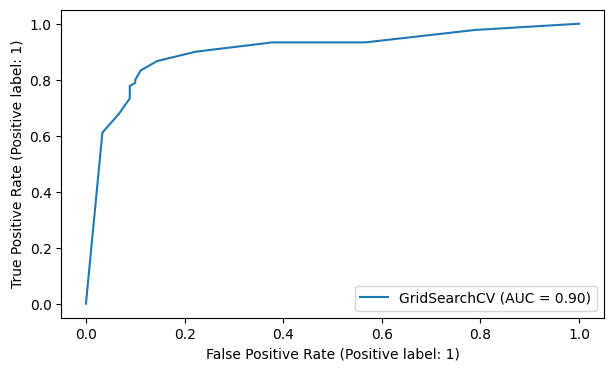

In [83]:
plot_roc_curve(knn_grid_model, X_test, y_test);

# Conclusion 
* Write a short summary of your findings, and decide which model you will use and why.

* log_model Accuracy Score: 0.88 
* log_model AUC : 0.93           

* knn Accuracy Score :   0.86  (k=5 with elbow)  - 0.85  (k=14 with gridsearch)
* knn AUC : 0.88 (elbow) - 0.90 (gridsearch)

* As a conclusion we aplied two models to predict raisins classes and we got prety decent scores both of them
* We decided to use the Logistic Model because of its slightly better score than the knn models, plus the interpretability of logistic regression and its lower computational cost.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___